In [73]:
# 📦 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# 🔍 Check version (Optional)
import matplotlib
print("Versions:")
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("yfinance:", yf.__version__)


Versions:
NumPy: 2.1.3
Pandas: 2.3.1
Matplotlib: 3.10.3
yfinance: 0.2.65


In [74]:
# 📈 Step 2: Download Google Stock Data
start = '2005-01-01'
end = '2025-06-30'
stock = 'GOOG'

data = yf.download(stock, start=start, end=end, auto_adjust=False)
data.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [75]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2005-01-03,5.018992,5.048826,5.071989,4.868253,4.916571,636143518
1,2005-01-04,4.815717,4.844342,5.054305,4.818937,5.016198,552298420
2,2005-01-05,4.791205,4.819685,4.904118,4.787804,4.818190,330698912
3,2005-01-06,4.668398,4.696148,4.879212,4.675475,4.858788,417041336
4,2005-01-07,4.799623,4.828153,4.838116,4.701876,4.748203,387964757
...,...,...,...,...,...,...,...
5149,2025-06-23,166.009995,166.009995,168.479996,163.330002,167.320007,36975600
5150,2025-06-24,167.740005,167.740005,169.250000,166.910004,167.684998,27310300
5151,2025-06-25,171.490005,171.490005,173.360001,168.561005,168.649994,23627400


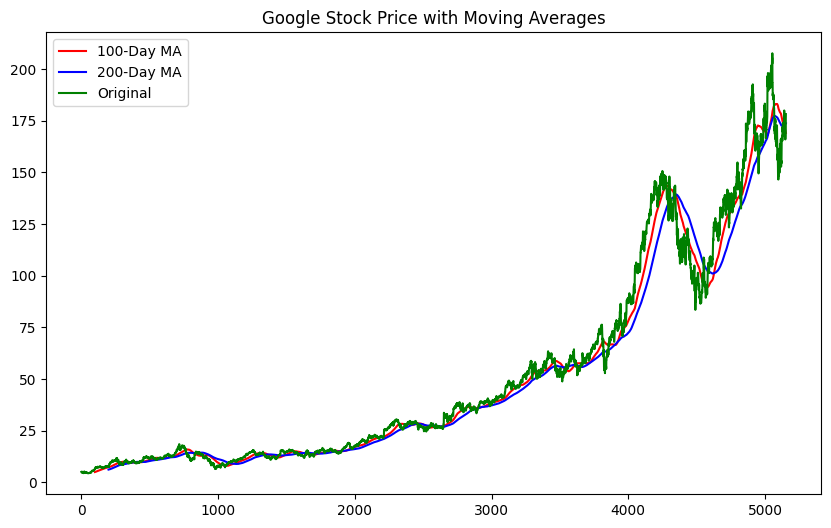

In [76]:
# 🟢 Step 3: Moving Averages for Visualization
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r', label='100-Day MA')
plt.plot(ma_200_days, 'b', label='200-Day MA')
plt.plot(data.Close, 'g', label='Original')
plt.legend()
plt.title('Google Stock Price with Moving Averages')
plt.show()


In [77]:
# ✂️ Step 4: Preprocess Data
data.dropna(inplace=True)

# Train-test split
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):])

# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)


In [78]:
# 📦 Step 5: Prepare LSTM Input for Training
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)

# Reshape for LSTM: (samples, time steps, features)
x = x.reshape(x.shape[0], x.shape[1], 1)


In [79]:
# 🧠 Step 6: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Users\Divyanshu Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# 🏋️‍♂️ Step 7: Train the Model
model.fit(x, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - loss: 0.0115
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - loss: 0.0019
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - loss: 0.0019
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - loss: 0.0012
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - loss: 0.0013
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - loss: 0.0015
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - loss: 0.0014
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - loss: 0.0011
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 0.0012
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step - loss: 9.9032e-04
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - loss: 0.0010
Epoch 12/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - loss: 0.0010
Epoch 13/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - loss: 0.0010
Epoch 14/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - loss: 0.0010
Epoch 15/50

In [84]:
# 📊 Step 8: Prepare Test Data
# ✅ Use last 100 days of training data for test sequence
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

# ❗ Don't fit again — use transform only!
data_test_scale = scaler.transform(data_test)

# Prepare test inputs
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [85]:
# 🔮 Step 9: Make Predictions & Inverse Transform
y_pred = model.predict(x_test)

# ✅ Correct inverse transform
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


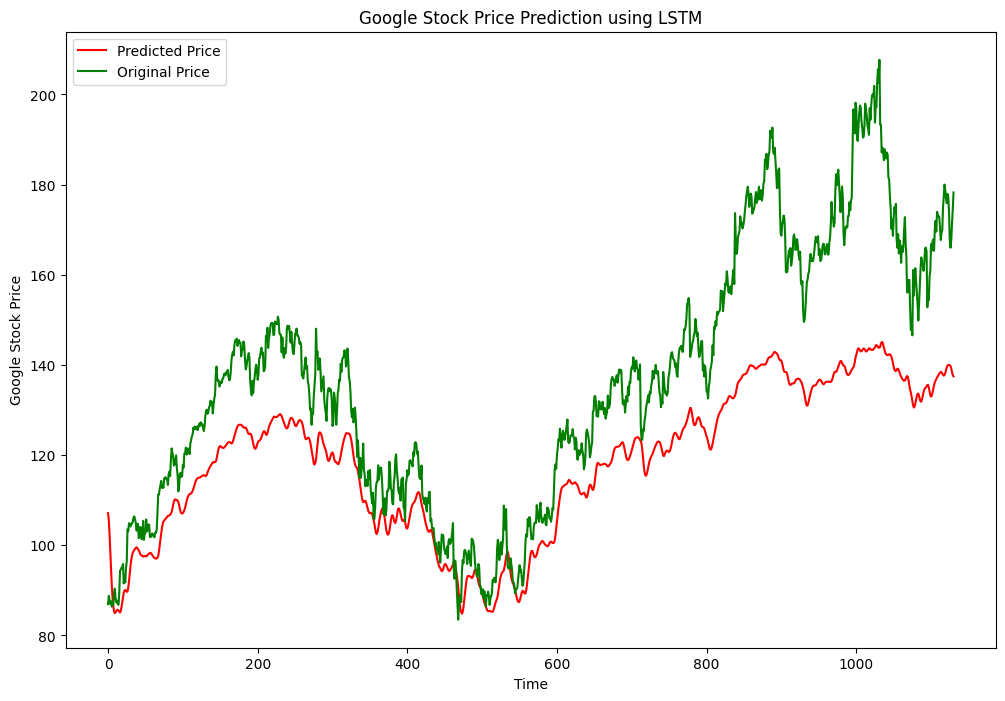

In [86]:
# 📈 Step 10: Plot Predictions vs Real
plt.figure(figsize=(12,8))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.title('Google Stock Price Prediction using LSTM')
plt.legend()
plt.show()


In [87]:
model.save('Stock_Predictions_Model.keras')
